In [10]:
from track_estimators.ship_track import ShipTrack
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Read the subsampled data
csv_file = "../data/modern_ships/WCE5063_subset_downsampled.csv"
ship_track = ShipTrack(csv_file)

In [12]:
def smooth(y, box_pts):
    box = np.ones(box_pts) / box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

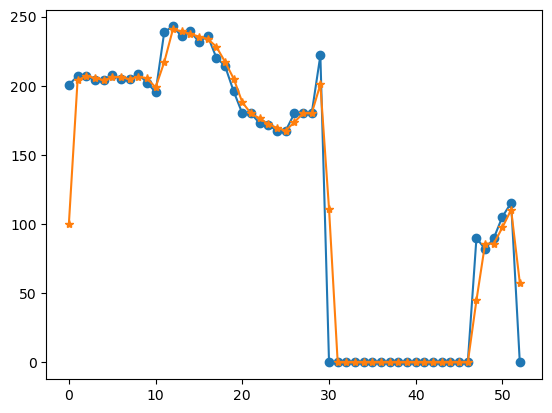

In [23]:
plt.plot(range(len(ship_track.cog)), ship_track.cog, "-o")
plt.plot(range(len(ship_track.cog)), smooth(ship_track.cog, 2), "-*")

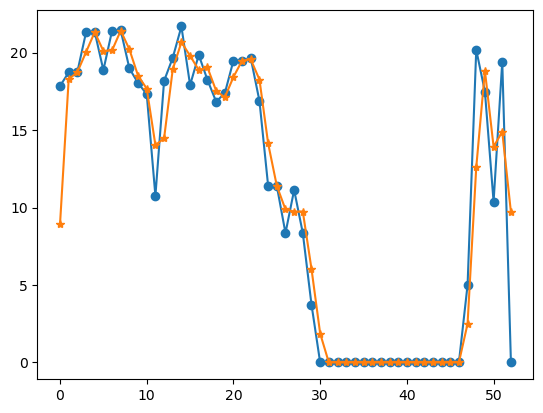

In [24]:
plt.plot(range(len(ship_track.sog)), ship_track.sog, "-o")
plt.plot(range(len(ship_track.sog)), smooth(ship_track.sog, 2), "-*")

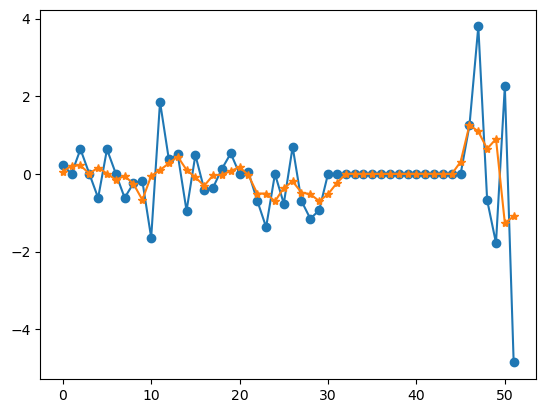

In [33]:
plt.plot(range(len(ship_track.sog_rate)), ship_track.sog_rate, "-o")
plt.plot(range(len(ship_track.sog_rate)), smooth(ship_track.sog_rate, 4), "-*")

In [31]:
from scipy.signal import savgol_filter    

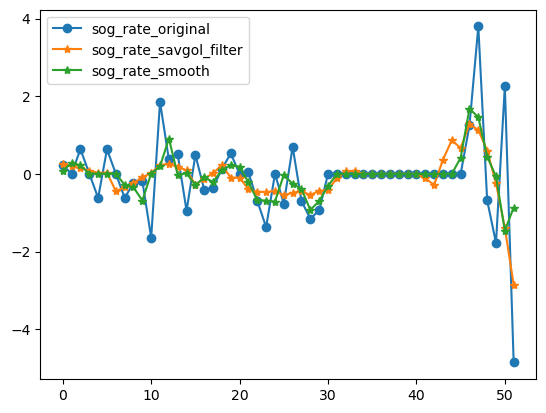

In [50]:
plt.plot(range(len(ship_track.sog_rate)), ship_track.sog_rate, "-o", label="sog_rate_original")
plt.plot(range(len(ship_track.sog_rate)), savgol_filter(ship_track.sog_rate, 10, 2), "-*", label="sog_rate_savgol_filter")
plt.plot(range(len(ship_track.sog_rate)), smooth(ship_track.sog_rate, 3), "-*", label="sog_rate_smooth")
plt.legend()